# Classification and Regression Trees (CART)

***Amaç veri seti içerisindeki karmaşık yapıları basit karar yapılarına dönüştürmektir.***

***Heterojen veri setleri belirlenmiş bir hedef değişkene göre homojen alt gruplara ayrılır.***

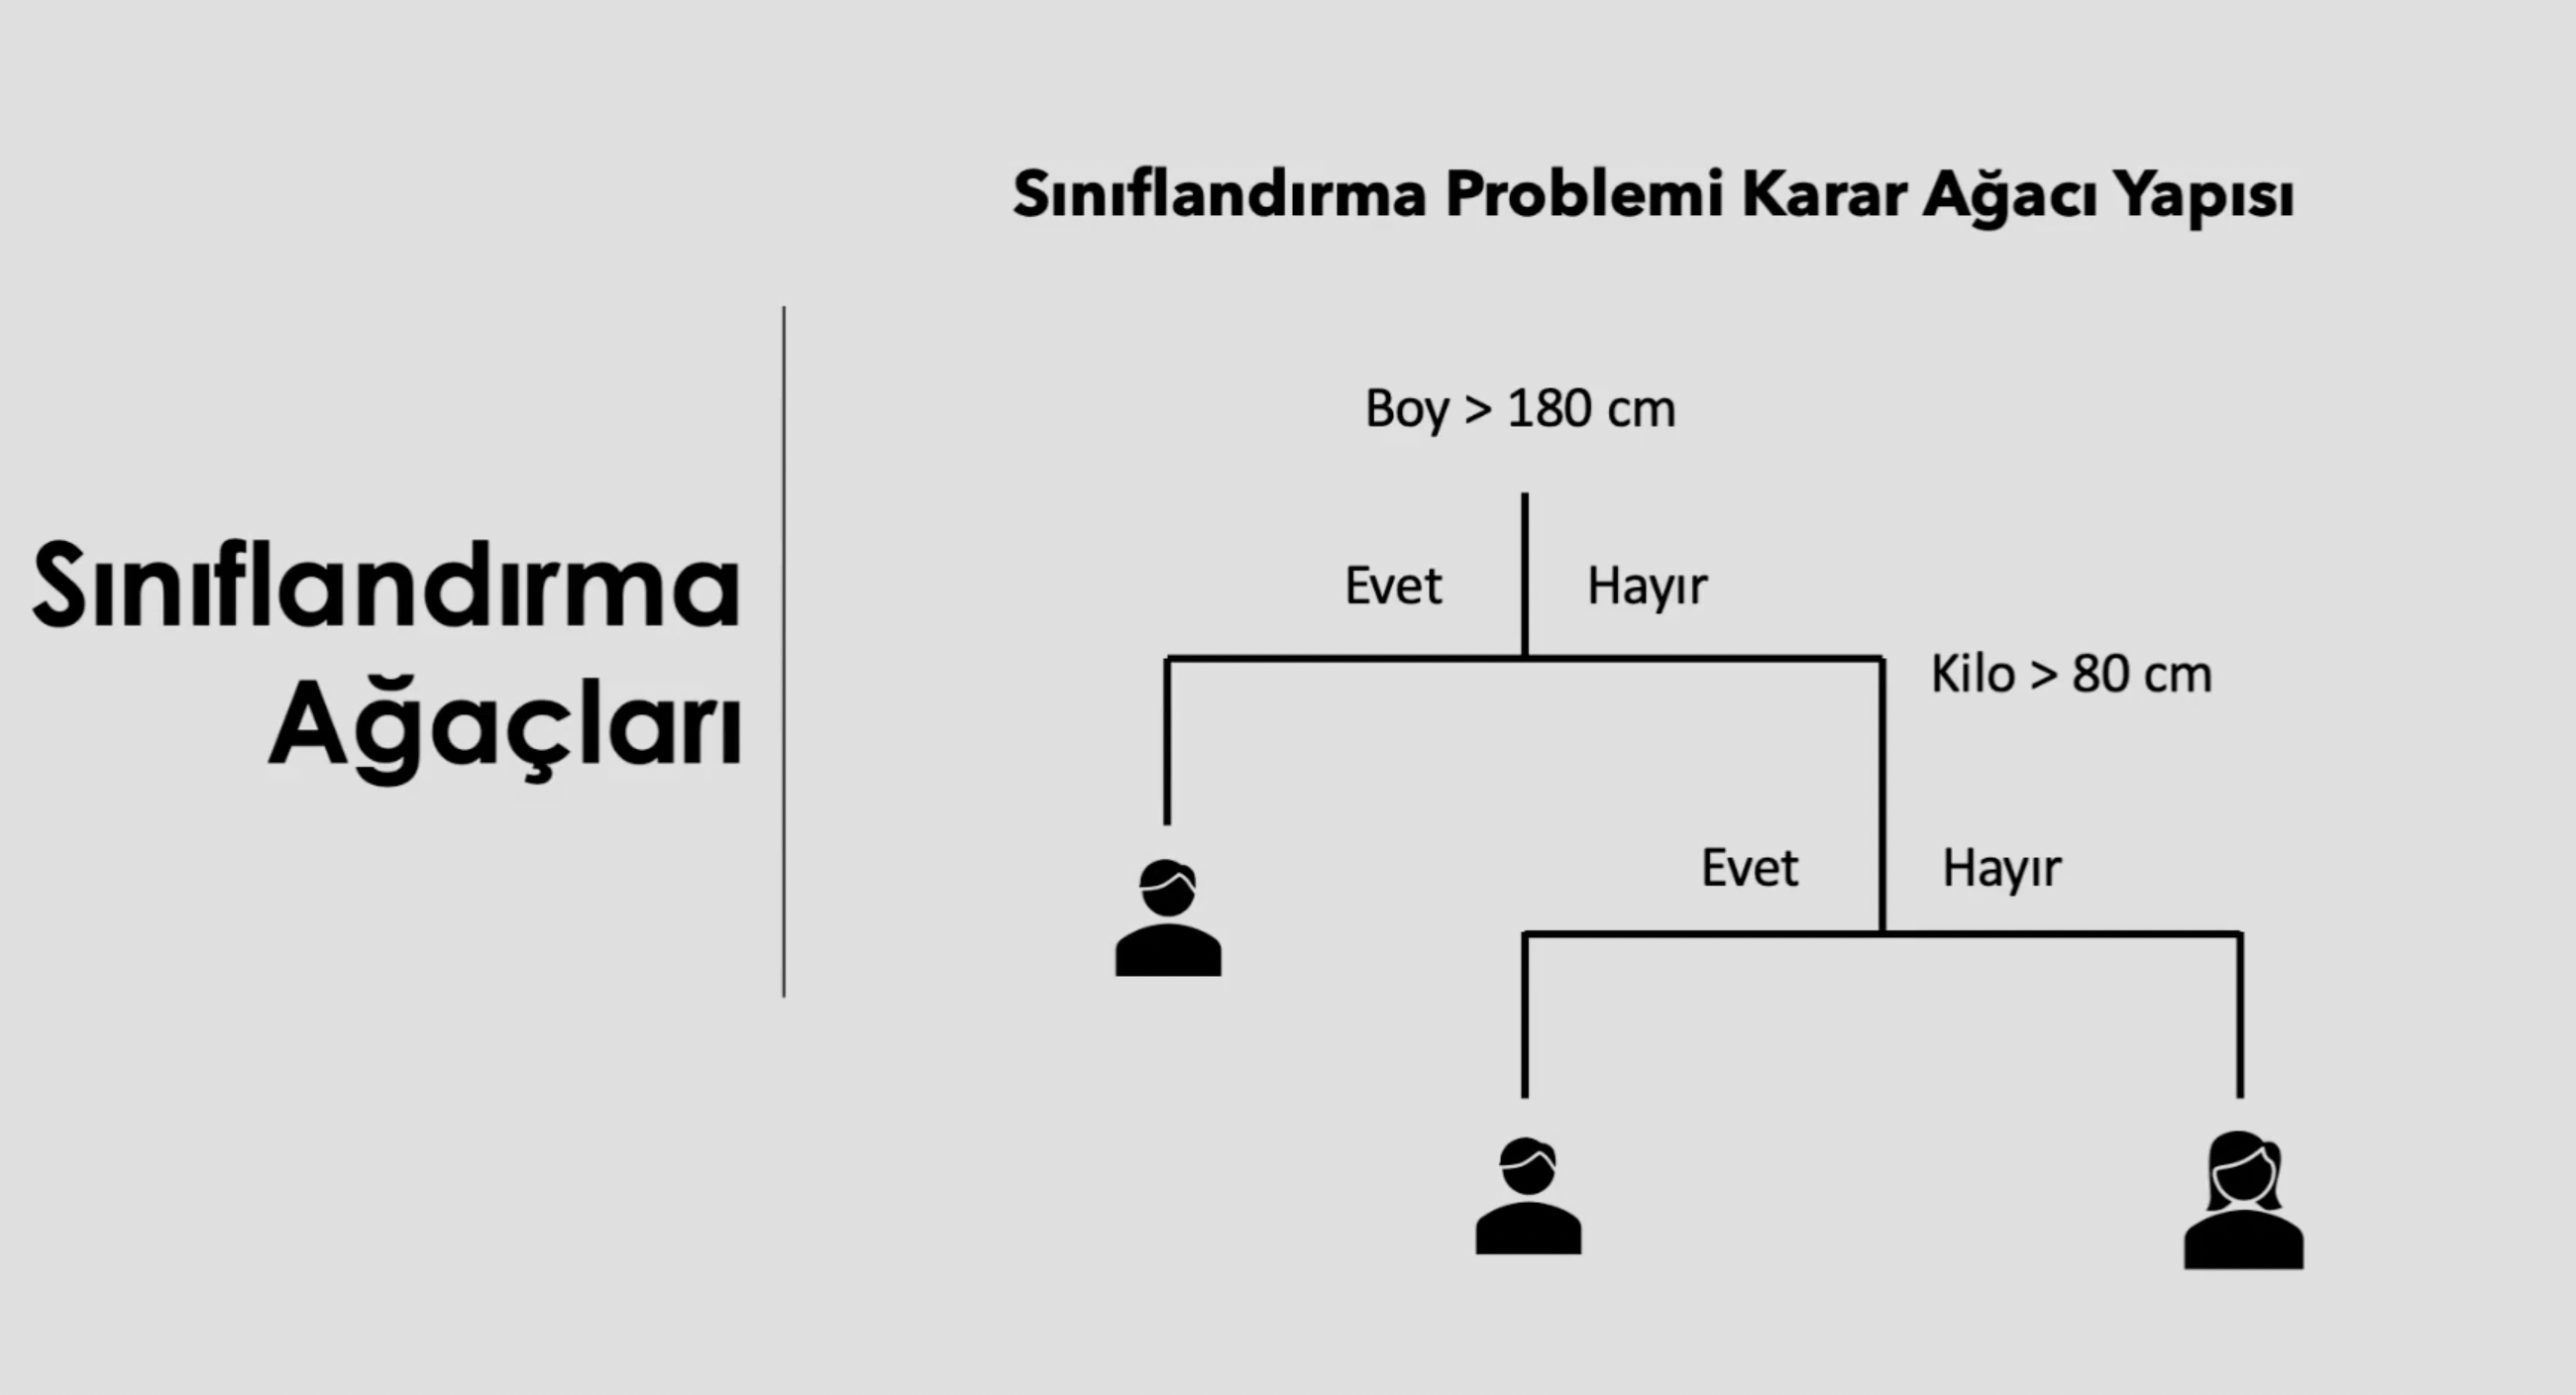

# Model

In [1]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier

from warnings import filterwarnings
filterwarnings('ignore')

diabetes = pd.read_csv("diabetes.csv")

In [22]:
df = diabetes.copy()
df = df.dropna()
y = df["Outcome"]
X = df.drop(['Outcome'], axis=1)
# X = df["Pregnancies"]
X = pd.DataFrame(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.30, 
                                                    random_state=42)

In [11]:
from sklearn.tree import DecisionTreeClassifier

In [27]:
cart = DecisionTreeClassifier()
cart_model = cart.fit(X_train, y_train)

In [28]:
cart_model

DecisionTreeClassifier()

In [29]:
# !pip install skompiler
from skompiler import skompile
print(skompile(cart_model.predict).to("python/code"))

((((((0 if x[6] <= 0.671999990940094 else 1 if x[6] <= 0.6974999904632568 else
    0) if x[5] <= 31.40000057220459 else ((0 if x[3] <= 40.5 else 1) if x[1
    ] <= 111.5 else ((0 if x[5] <= 32.59999942779541 else 1) if x[5] <= 
    37.39999961853027 else 0) if x[2] <= 72.0 else 1) if x[4] <= 9.0 else (
    0 if x[6] <= 0.6395000219345093 else 1 if x[6] <= 0.6759999990463257 else
    0) if x[0] <= 4.5 else 1 if x[7] <= 26.5 else 0) if x[5] <= 
    49.10000038146973 else 1) if x[1] <= 127.5 else 1 if x[2] <= 56.0 else 
    (0 if x[7] <= 27.5 else 1 if x[6] <= 0.32649999111890793 else 0) if x[5
    ] <= 30.300000190734863 else 1 if x[5] <= 32.000000953674316 else ((0 if
    x[5] <= 33.75 else 1) if x[0] <= 0.5 else 1 if x[5] <= 
    32.45000076293945 else 0) if x[2] <= 85.0 else 1) if x[7] <= 28.5 else 
    (1 if x[7] <= 29.5 else (0 if x[1] <= 133.0 else (1 if x[2] <= 74.0 else
    0) if x[0] <= 4.5 else 0) if x[2] <= 94.0 else 1 if x[5] <= 12.0 else 0
    ) if x[5] <= 26.949999809265137

In [20]:
x = [9]

In [21]:
((0 if x[0] <= 2.5 else 0) if x[0] <= 6.5 else 1 if x[0] <= 13.5 else 1)

1

In [30]:
y_pred = cart_model.predict(X_test)
accuracy_score(y_test, y_pred) 

0.683982683982684

# Model Tuning

In [32]:
?cart_model

Type:        DecisionTreeClassifier
String form: DecisionTreeClassifier()
File:        /opt/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py
Docstring:  
A decision tree classifier.

Read more in the :ref:`User Guide <tree>`.

Parameters
----------
criterion : {"gini", "entropy"}, default="gini"
    The function to measure the quality of a split. Supported criteria are
    "gini" for the Gini impurity and "entropy" for the information gain.

splitter : {"best", "random"}, default="best"
    The strategy used to choose the split at each node. Supported
    strategies are "best" to choose the best split and "random" to choose
    the best random split.

max_depth : int, default=None
    The maximum depth of the tree. If None, then nodes are expanded until
    all leaves are pure or until all leaves contain less than
    min_samples_split samples.

min_samples_split : int or float, default=2
    The minimum number of samples required to split an internal node:

    - If int,

In [33]:
cart_grid = {"max_depth": range(1,10),
            "min_samples_split" : list(range(2,50)) }

In [35]:
cart = tree.DecisionTreeClassifier()
cart_cv = GridSearchCV(cart, cart_grid, cv = 10, n_jobs = -1, verbose = 2)
cart_cv_model = cart_cv.fit(X_train, y_train)

Fitting 10 folds for each of 432 candidates, totalling 4320 fits
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ..................max_depth=5, min_samples_split=49; total time=   0.0s
[CV] END ...................max_depth=6, min_samples_split=2; total time=   0.0s
[CV] END ...................max_depth=6, min

In [36]:
print("En iyi parametreler: " + str(cart_cv_model.best_params_))

En iyi parametreler: {'max_depth': 5, 'min_samples_split': 19}


In [37]:
cart = tree.DecisionTreeClassifier(max_depth = 5, min_samples_split = 19)
cart_tuned = cart.fit(X_train, y_train)

In [38]:
y_pred = cart_tuned.predict(X_test)
accuracy_score(y_test, y_pred)

0.7532467532467533

[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=46; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=47; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=47; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=47; total time=   0.0s
[CV] END ..................max_depth=4, min_samples_split=47; total time=   0.0s
[CV] END ..................m